In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style='text-align:center;'>Inequalities in Directed Networks</h1>

<h2>Dependencies</h2>

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import sys
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%load_ext autoreload
%autoreload 2
sys.path.append('../code')

from org.gesis.libs import io
from org.gesis.libs import viz
from org.gesis.libs import ranking
from org.gesis.libs import network
from org.gesis.libs.utils import printf

<h2>Constants</h2>

In [4]:
DATASETS = ['aps', 'apsgender3', 'apsgender8', 'github', 'pokec', 'wikipedia'] #'twitter'
MODELS = ['DH', 'DBA', 'DHBA']
ROOT = '../data/'
PLOTS = '../plots/'
OUTPUT = "../results-batch/"

<h2>I. Evidence from Empirical Networks</h2>

In [5]:
fn = os.path.join(OUTPUT, 'summary_datasets.csv')
df_summary_empirical = io.read_csv(fn)
df_summary_empirical

,dataset,N,cc,class,m,M,fm,E,Emm,EMM,...,EMm,density,gammaM,kminM,gammam,kminm,hMM,hmm,triadsratio,triadspdf
0,APS,1853,173,pacs,05.20.-y,05.30.-d,0.38,3638,0.294,0.650,...,0.029,0.00106,2.880254,4.0,5.020234,5.0,0.95,0.93,7.741234e-07,"[0.0, 0.2602935911206588, 0.0, 0.6942355889724..."
1,APSgender3,9679,174,gender,female,male,0.10,174760,0.015,0.818,...,0.085,0.00187,4.913199,105.0,1.830627,11.0,0.82,0.27,6.067675e-06,"[0.0, 0.002463174282732545, 0.0, 0.74432729978..."
2,APSgender8,10059,300,gender,female,male,0.11,183067,0.011,0.829,...,0.080,0.00181,1.855324,13.0,1.914697,11.0,0.50,0.60,2.384959e-05,"[0.0, 0.0006445705130733074, 0.0, 0.7775175926..."
3,Github,296612,6965,gender,female,male,0.06,1723930,0.005,0.899,...,0.051,0.00002,2.847932,60.0,2.661940,21.0,0.55,0.61,2.551588e-10,"[0.00012062479001814398, 0.0006425589775966516..."
4,Pokec,1632636,1,gender,1,0,0.49,30622117,0.195,0.250,...,0.248,0.00001,4.506221,131.0,3.850320,109.0,0.51,0.38,2.853004e-11,"[0.043744452862550076, 0.0685444396945499, 0.0..."
5,Wikipedia,3159,66,gender,female,male,0.15,14890,0.030,0.785,...,0.078,0.00149,3.647207,17.0,2.435874,5.0,0.67,0.58,1.416910e-06,"[0.0009691331104327179, 0.0026166593981683385,..."


In [6]:
df_metadata_empirical = network.load_all_datasets_node_metadata_empirical(DATASETS, ROOT)

<h3>Vertical and Horizontal inequalities</h3>

In [7]:
df_rank_empirical = ranking.rank_empirical(ROOT, df_summary_empirical.dataset.unique(), OUTPUT)

../plots/vh_inequalities_empirical.pdf saved!


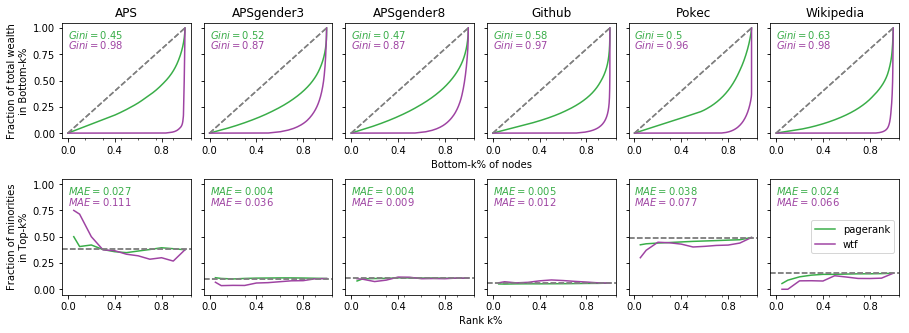

In [8]:
fn = os.path.join(PLOTS, 'vh_inequalities_empirical.pdf')
viz.plot_vh_inequalities_per_dataset_and_metric(df_metadata_empirical, df_rank_empirical, df_summary_empirical, fn=fn)

<h2>II. Model-Fit: Modelling underlying link mechanisms</h2>

In [9]:
model = 'DHBA'

In [10]:
df_metadata_fit = network.load_all_datasets_node_metadata_fit(DATASETS, OUTPUT)

<h3>Power-law degree distributions</h3>

Not enough data. Returning nan
Not enough data. Returning nan


../plots/degree_distributions_fit.pdf saved!


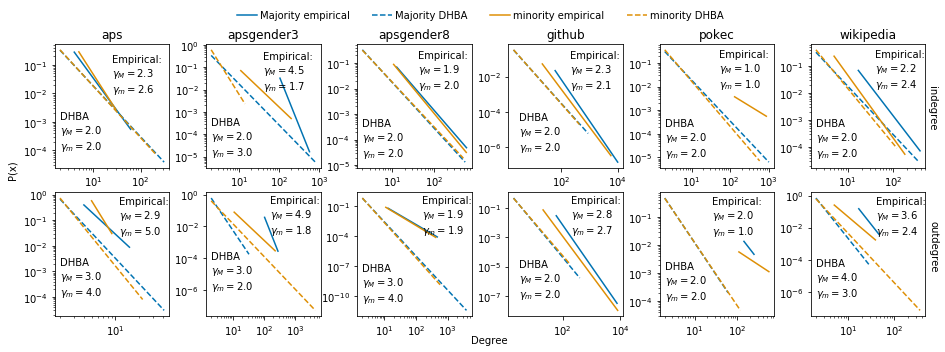

In [11]:
fn = os.path.join(PLOTS, 'degree_distributions_fit.pdf')
viz.plot_degree_distributions_groups_fit(df_summary_empirical,
                                         df_metadata_empirical, 
                                         df_metadata_fit, 
                                         model=model,
                                         fn=fn)

<h3>Vertical and Horizontal inequalities</h3>

In [12]:
df_rank_fit = ranking.rank_fit(df_summary_empirical.dataset.unique(), OUTPUT) 

In [13]:
df_rank = df_rank_empirical.copy()
df_rank = df_rank.append(df_rank_fit.copy())

../plots/vh_inequalities_fit_grouped.pdf saved!


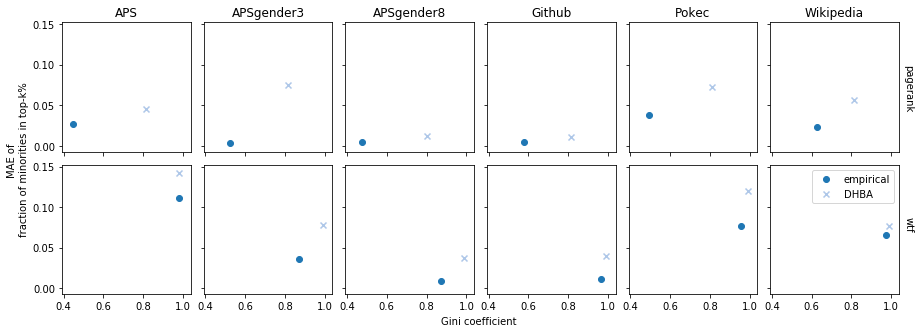

In [14]:
group = True
fn = os.path.join(PLOTS, 'vh_inequalities_fit{}.pdf'.format('_grouped' if group else ''))
viz.plot_vh_inequalities_fit(df_rank, group=group, fn=fn)

<h2>III. Model-Tuning: Network structure vs Inequalities</h2>

<div style='color: blue;'>
    $N = 2000$ <br />
    $m=2$ <br />
    $\gamma_m = \gamma_M = 2.5$ <br />
    $density = 0.001$
</div>

In [15]:
df_rank_synthetic = ranking.rank_vh_inequalities_synthetic(model, OUTPUT)

<h3>Vertical and Horizontal inequalities</h3>

../plots/vh_inequalities_synthetic_DHBA_pagerank_sym.pdf saved!


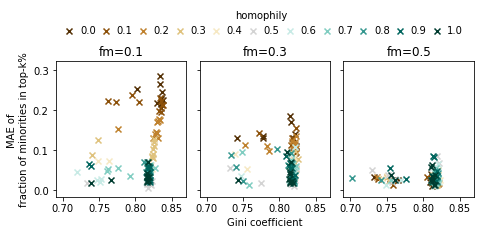

In [16]:
metric = 'pagerank'
sym = True

fn = os.path.join(PLOTS, 'vh_inequalities_synthetic_{}_{}_{}sym.pdf'.format(model, metric, 'a' if not sym else ''))
viz.plot_vh_inequalities_synthetic(df_rank_synthetic, metric=metric, sym=sym, fn=fn)

../plots/vh_inequalities_synthetic_DHBA_pagerank_asym.pdf saved!


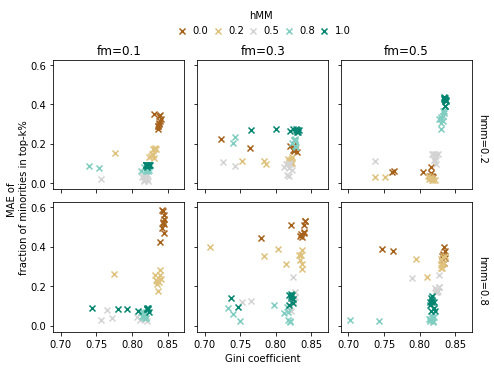

In [17]:
sym = False

fn = os.path.join(PLOTS, 'vh_inequalities_synthetic_{}_{}_{}sym.pdf'.format(model, metric, 'a' if not sym else ''))
viz.plot_vh_inequalities_synthetic(df_rank_synthetic, metric=metric, sym=sym, fn=fn)